# Proyek 1: Klasifikasi Gambar menggunakan CNN

## Deskripsi Proyek

Dalam proyek ini, kamu akan membangun model Convolutional Neural Network (CNN) untuk mengklasifikasikan gambar-gambar. Salah satu dataset yang sering digunakan dalam tugas ini adalah CIFAR-10, yang berisi 60,000 gambar dalam 10 kategori berbeda, seperti pesawat terbang, mobil, burung, kucing, dll. Setiap gambar berukuran 32x32 piksel dan memiliki 3 saluran warna (RGB). Tujuan dari proyek ini adalah untuk membangun model CNN yang dapat mengklasifikasikan gambar ke dalam kategori yang benar edasarkan fitur-fitur yang diekstraksi dari gambar tersebut.

## Langkah-langkah Proyek

### 1. Memuat Dataset

Dataset CIFAR-10 dapat diunduh dari Keras Datasets. Dataset ini terbagi menjadi data pelatihan sebanyak 50,000 gambar dan data pengujian sebanyak 10,000 gambar.

### 2. Persiapan Data

Preprocessing: Data gambar akan dinormalisasi (piksel gambar diubah ke rentang [0,1]) dan label akan dibuah ke format one-hot encoding untuk klasifikasi multi-kelas.

## 3. Membangun Model CNN

- Convolutional Layers: Beberapa layer konvolusi digunakan untuk mengekstrasi fitur lokal dari gambar, seperti tepi, tekstur, dan pola.
- Pooling Layers: Max-pooling digunakan untuk mengurangi dimensi data dan mempertahankan informasi penting.
- Fully Connected Layers: Setelah ekstraksi fitur, gambar akan melewati beberapa layer dense (fully connected) yang akhirnya menghasilkan probabilitas kelas untuk setiap gambar.
- Output Layer: Output layer menggunakan fungsi aktivasi softmax untuk menghasilkan distribusi probabilitas yang sesuai dengan 10 kelas.

### 4. Melatih Model

- Fungsi Loss: Categorical cross-entropy digunakan sebagai fungsi loss untuk mengukur kesalahan antara prediksi model dan label asli
- Optimizer: Adam dipilih optimizer untuk memperbarui bobot model selama pelatihan.

### 5. Evaluasi Model

- Setelah melatih model, kita akan mengujinya menggunakan data pengujian untuk mengevaluasi akurasi model dan melihat seerapa baik model mengklasifikasikan gambar yang belum dilihat sebelumnya.

### 6. Visualiasi Hasil

- Hasil Pelatihan (akurasi dan loss) akan divisualisasikan dalam bentuk grafik untuk memantau kinerja model.
- Hasil prediksi model terhadap gambar-gambar uji juga akan divisualisasikan untuk melihat bagaimana model memprediksi kelas dari gambar yang berbeda.

### 7. Peningkatan Model

- Teknik regularisasi seperti dropout dapat digunakan untuk mencegah overfitting.
- Augmentasi Data dapat diterapkan untukk memperbesar dataset dan meningkatkan kemampuan generalisasi model

## Alat yang digunakan

- Python: Bahasa pemrograman untuk implementasi model.
- TensorFlow/Keras: Framework deep learning untuk membangun dan melatih model CNN.
- Matplotlib: Untuk visualisasi grafik pelatihan dan prediksi.

## Hasil yang diharapkan

- Model CNN yang dapat mengklasifikasikan gambar-gambar dari dataset CIFAR-10 dengan akurasi tinggi.
- Visualisasi yang menunjukkan progres pelatihan dan validasi.
- Prediksi yang dapat dibandingkan dengan label sebenarnya untuk evaluasi kinerja model.

Proyek ini memberikan pemahaman yang lebih dalam tentang cara menggunakan Convolutional Neural Networks(CNNs) untuk tugas klasifikasi gambar, serta bagaimana menangani dataset yang lebih besar dan menantang.

In [5]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 46ms/step - accuracy: 0.3346 - loss: 1.7932 - val_accuracy: 0.5373 - val_loss: 1.3108
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.5503 - loss: 1.2568 - val_accuracy: 0.6012 - val_loss: 1.1292
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6206 - loss: 1.0797 - val_accuracy: 0.6425 - val_loss: 1.0236
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6617 - loss: 0.9679 - val_accuracy: 0.6318 - val_loss: 1.0393
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6901 - loss: 0.8921 - val_accuracy: 0.6648 - val_loss: 0.9462
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7098 - loss: 0.8279 - val_accuracy: 0.6855 - val_loss: 0.9134
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7291 - loss: 0.7799 - val_accuracy: 0.7067 - val_loss: 0.8493
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7406 - loss: 0.7345 - 

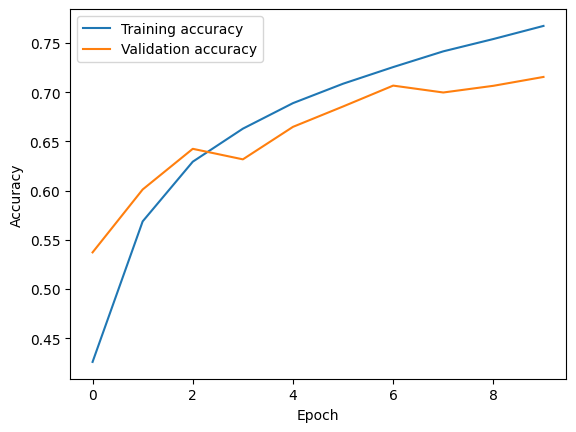

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# 1. Memuat Dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 2. Normalisasi data (nilai piksel gambar ke rentang [0. 1])
x_train, x_test = x_train / 255.0, x_test /255.0

# 3. Mengubah label menjadi format one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 4. Membangun Model CNN
model = models.Sequential()

# Layer konvolusi pertama
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Layer konvolusi kedua
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Layer konvolusi ketiga
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten layer sebelum input ke fully connected layer
model.add(layers.Flatten())

# Fully connected layer pertama
model.add(layers.Dense(64, activation='relu'))

# Output layer dengan softmax
model.add(layers.Dense(10, activation="softmax"))

# 5. Menyusun Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Melatih Model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# 7. Evaluasi Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# 8. Visualisasi Hasil Pelatihan
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

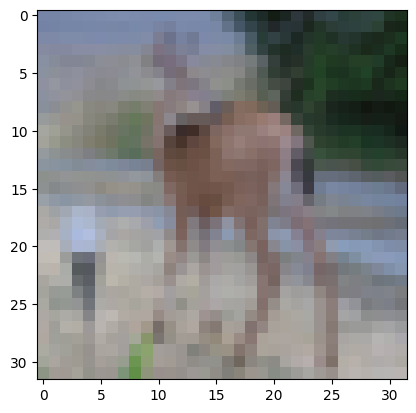

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted label: 4


In [11]:
# 9. Prediksi Gambar dari Test Set
import numpy as np

# Ambil gambar pertama dari test set
img = x_test[100]
plt.imshow(img)
plt.show()

# Prediksi kelas gambar pertama
img = np.expand_dims(img, axis=0) # Tambahkan dimensi batch
predicted_class = model.predict(img)
predicted_label = np.argmax(predicted_class, axis=1)

# Cetak label prediksi
print(f'Predicted label: {predicted_label[0]}')

## Penjelasan Hasil Predicted label: 3

Jika predicted label = 3 pada CIFAR-10, maka kategori gambar yang diprediksi adalah Cat (Kucing). Berikut urutan berdasarkan indexnya:
- 0: Airplane (Pesawat Terbang)
- 1: Automobile (Mobil)
- 2: Bird (Burung)
- 3: Cat (Kucing)
- 4: Deer (Rusa)
- 5: Dog (Anjing)
- 6: Frog (Katak)
- 7: Horse (Kuda)
- 8: Ship (Kapal)
- 9: Truck (Truk)

## Penjelasan Kode

### 1. Memuat dan mempersiapkan data

- Dataset CIFAR-10 dimuat menggunakan cifar10.load_data(). Data pelatihan (x_train, y_train) dan data pengujian (x_test, y_test) akan dibagi.
- Gambar dinormalisasi agar nilai piksel berada dalam rentang [0, 1].
- Label (target) juga dikonversi ke dalam format one-hot encoding menggunakan to_categorical.

### 2. Membangun model CNN

- Tiga layer konvolusi digunakan untuk mengekstraksi fitur dari gambar.
- Setelah layer konvolusi, hasilnya diratakan (flatten) dan dilanjutkan dengan fully connected layer.
- Output layer menggunakan fungsi aktivasi softmax untuk klasifikasi multi-kelas.

### 3. Melatih model

- Model disusun dengan optimizer Adam dan fungsi loss categorical_crossentropy.
- Model dilatih selama 10 epoch dengan batch size 64 dan data validasi menggunakan data pengujian.
- Batch size 64 artinya misal 10.000 data, maka 10.000/64 = 156 batch.

### 4. Evaluasi dan visualisasi

- Setelah pelatihan, akurasi pada data pengujian diukur dan ditampilkan.
- Hasil pelatihan (akurasi pelatihan dan validasi) divisualisasikan dalam bentuk grafik.

### 5. Prediksi

- Model digunakan untuk memprediksi kelas dari gambar uji pertama. Gambar yang dipilih ditampilkan dan label prediksi dicetak.